In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2.1	Data Acquisition

In [2]:
original_data = pd.read_csv("OnlineNewsPopularity.csv")
original_data.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [3]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

# 2.2 Data Preparation

In [4]:
data = original_data.drop(labels=['url'], axis = 1) # drop the non-predict feature "url"

col_names = data.columns.tolist()  # there is a space in front of each feature, so remove the space

for index,value in enumerate(col_names):
    col_names[index]= value.replace(" ","")
    
data.columns=col_names 
data.head()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      731.0            12.0             219.0         0.663594   
1      731.0             9.0             255.0         0.604743   
2      731.0             9.0             211.0         0.575130   
3      731.0             9.0             531.0         0.503788   
4      731.0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  min_positive_polarity  max_positive_polarity  \
0       1.0         0.0  ...               0.100000                    0.7   
1       1.0         0.0  ...               0.033333                    0.7   
2       1.0         0.0  ...               0.100000                    1.0   
3       1.0         0.0  ...               0.136364                    0.8   
4      20.0         0.0  ...               0.033333                    1.0   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 60 columns]

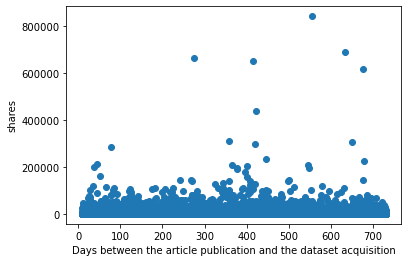

In [5]:
# investigate the relation between timedelta and number of shares
time = data.sort_values("timedelta")["timedelta"]
share = data.sort_values("timedelta")["shares"]
plt.xlabel("Days between the article publication and the dataset acquisition")
plt.ylabel("shares")
plt.scatter(time,share)
plt.show()

In [6]:
data['timedelta'].corr(data['shares']) # verify the correlation of timedelta and number of shares

0.00866228771126255

In [7]:
data.drop(labels=['timedelta'], axis=1, inplace=True) # after the verify process, this feature can also be dropped

with Heatmap to drop the high correlation features

<AxesSubplot:>

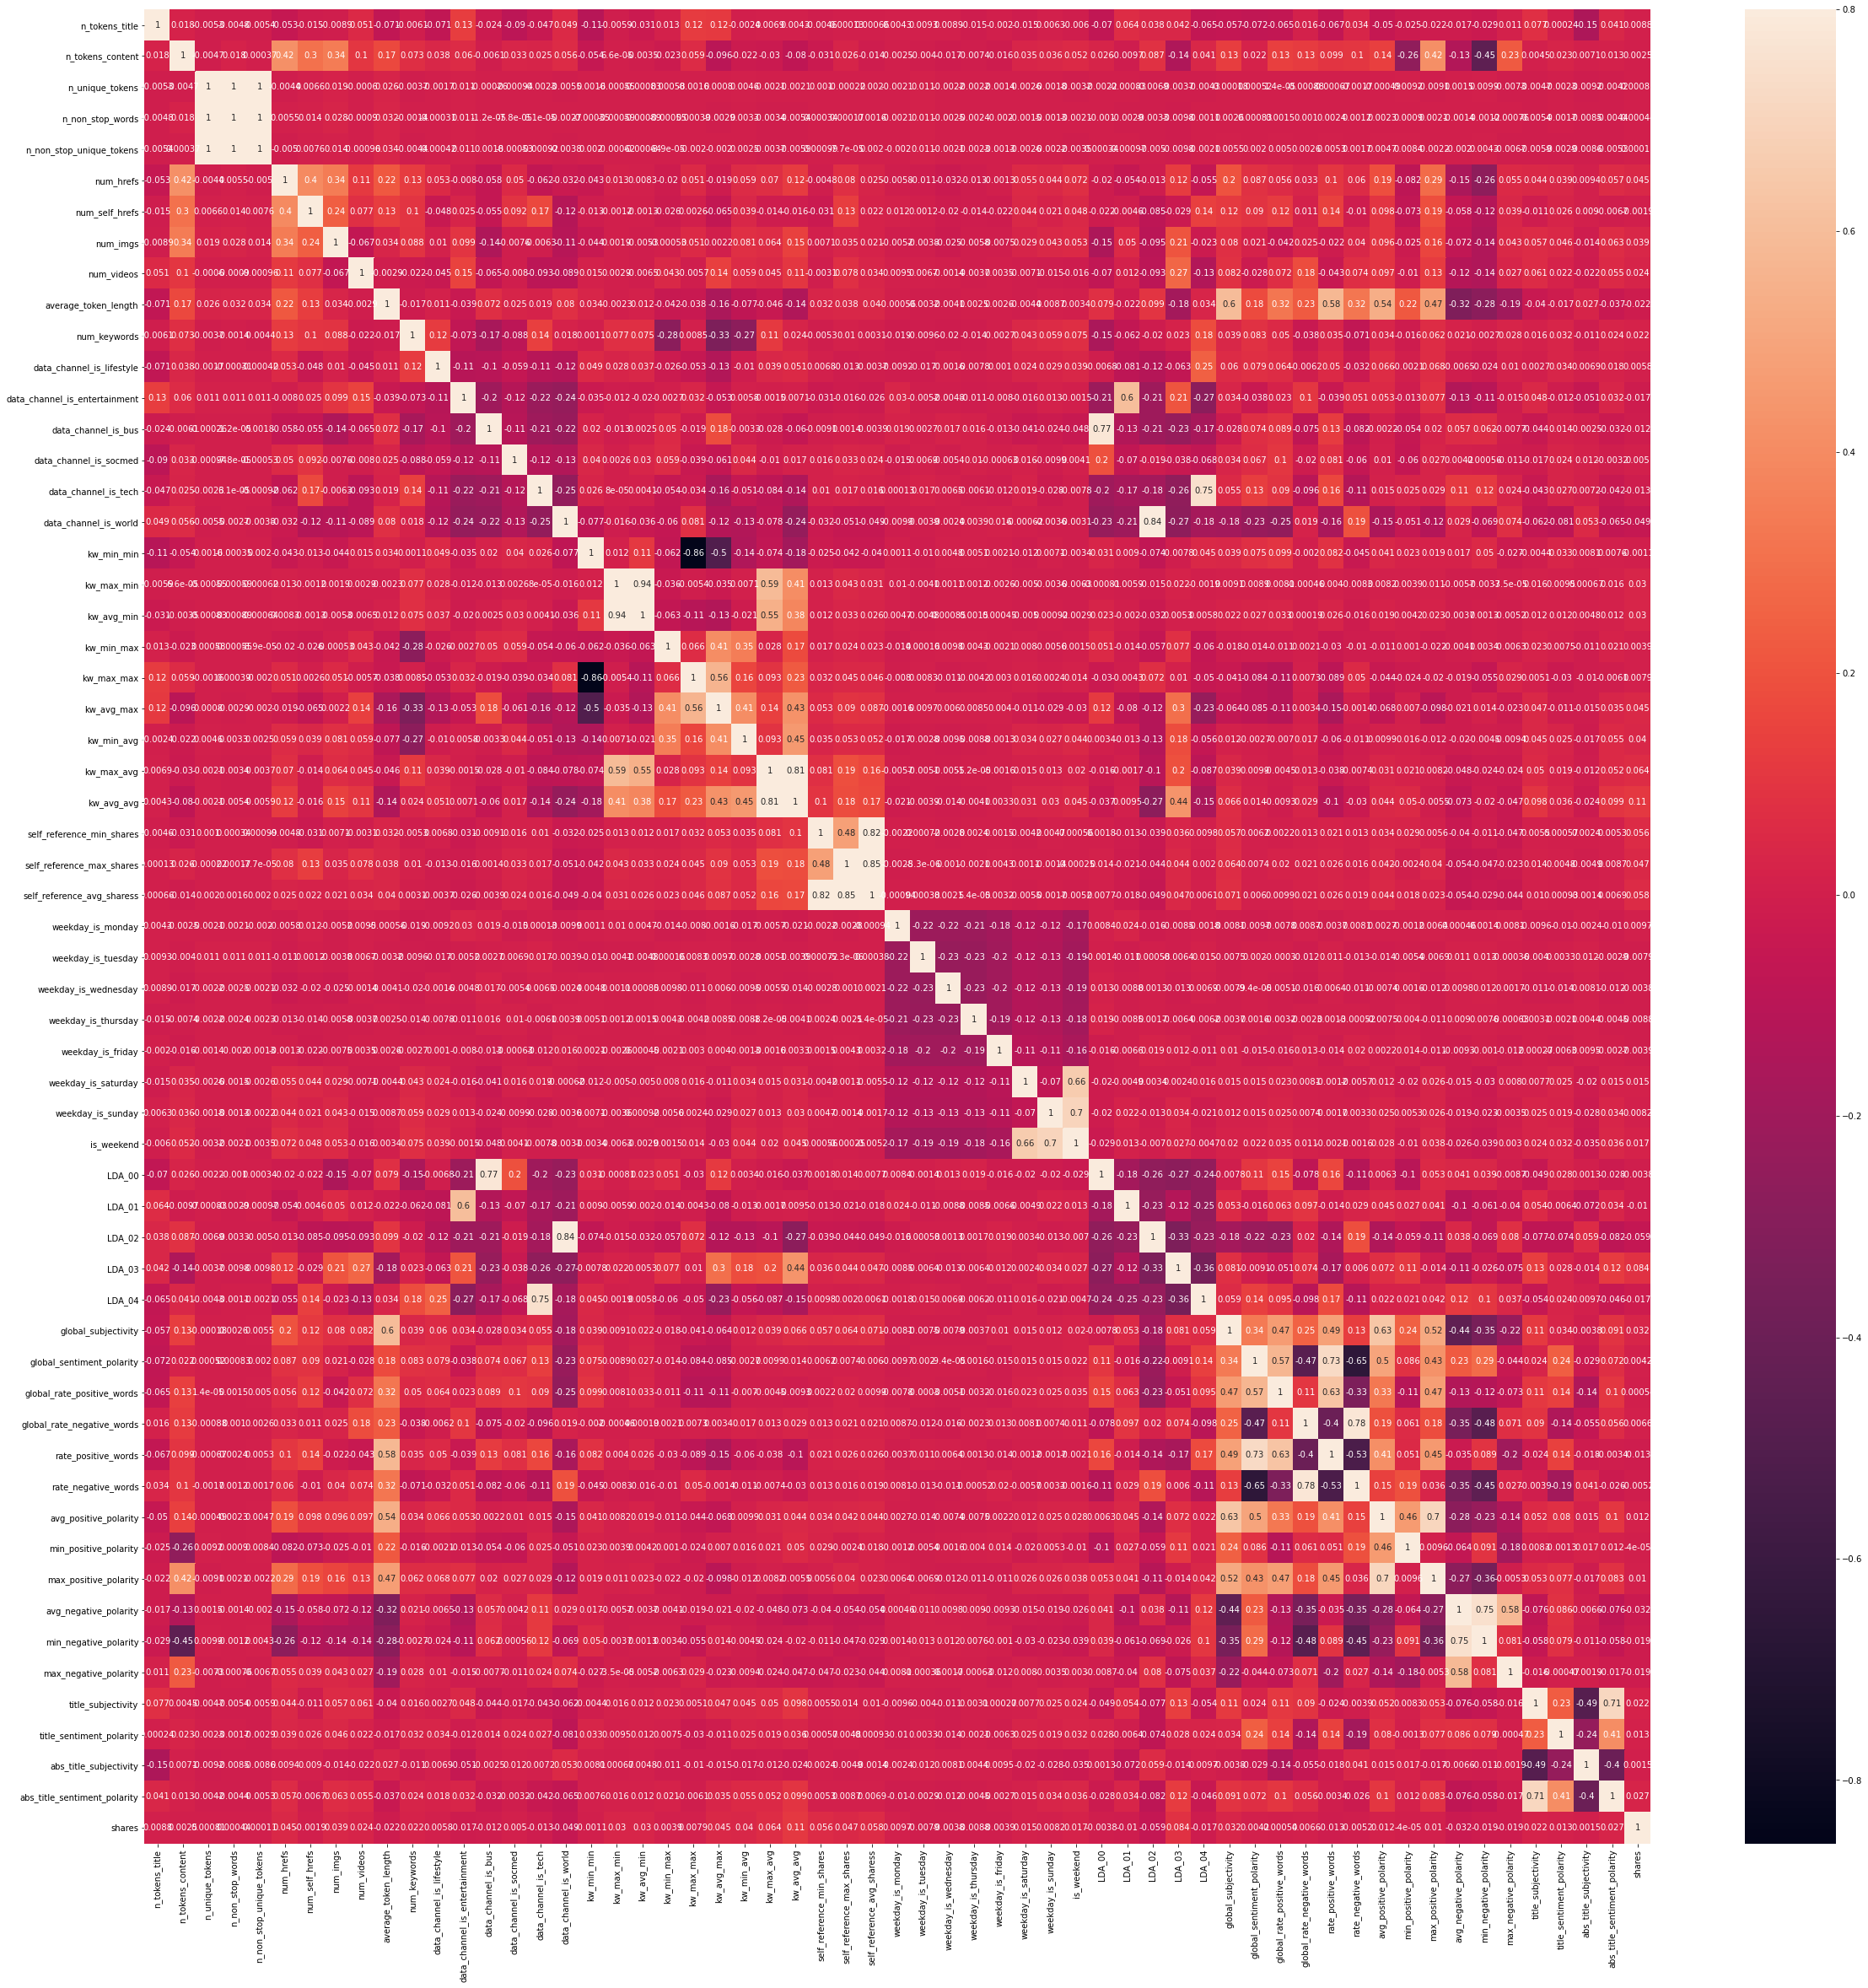

In [8]:
import seaborn as sns

plt.figure(figsize=(40,40))
sns.heatmap(data=data.corr(),vmax=0.8,annot=True)

drop the high correlation features

In [9]:
drop_list = ['n_non_stop_words',
             'n_non_stop_unique_tokens',
             'kw_max_max',
             'kw_max_min',
             'kw_max_avg',
             'self_reference_min_shares',
             'self_reference_max_shares']

new_data = data.drop(labels=drop_list, axis=1)

One-hot features reverse

In [10]:
publishdayMerge=new_data[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday']]

de_onehot=[]
for i in range(publishdayMerge.shape[0]):
    
    if publishdayMerge.iloc[i][0] == 1:
        de_onehot.append("monday")
        
    elif publishdayMerge.iloc[i][1] == 1:
        de_onehot.append("tuesday")
        
    elif publishdayMerge.iloc[i][2] == 1:
        de_onehot.append("wednesday")
        
    elif publishdayMerge.iloc[i][3] == 1:
        de_onehot.append("thursday")
        
    elif publishdayMerge.iloc[i][4] == 1:
        de_onehot.append("friday")
        
    elif publishdayMerge.iloc[i][5] == 1:
        de_onehot.append("saturday")
        
    else:
        de_onehot.append("sunday")

new_data.insert(0,'weekdays', value=de_onehot)

In [11]:
ChannelMerge=new_data[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]

de_onehot_2 = []
for i in range(ChannelMerge.shape[0]):
    
    if ChannelMerge.iloc[i][0] == 1:
        de_onehot_2.append("lifestyle")
        
    elif ChannelMerge.iloc[i][1] == 1:
        de_onehot_2.append("entertainment")
        
    elif ChannelMerge.iloc[i][2] == 1:
        de_onehot_2.append("bus")
        
    elif ChannelMerge.iloc[i][3] == 1:
        de_onehot_2.append("socmed")
        
    elif ChannelMerge.iloc[i][4] == 1:
        de_onehot_2.append("tech")
        
    else:
        de_onehot_2.append("world")
        
new_data.insert(1,'channel', value=de_onehot_2)

In [12]:
explore_data = new_data.drop(labels=['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday','is_weekend'], axis = 1)

In [13]:
explore_data

weekdays        channel  n_tokens_title  n_tokens_content  \
0         monday  entertainment            12.0             219.0   
1         monday            bus             9.0             255.0   
2         monday            bus             9.0             211.0   
3         monday  entertainment             9.0             531.0   
4         monday           tech            13.0            1072.0   
...          ...            ...             ...               ...   
39639  wednesday           tech            11.0             346.0   
39640  wednesday         socmed            12.0             328.0   
39641  wednesday          world            10.0             442.0   
39642  wednesday          world             6.0             682.0   
39643  wednesday  entertainment            10.0             157.0   

       n_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0             0.663594        4.0             2.0       1.0         0.0   
1             0.604743        3.0             1.0       1.0         0.0   
2             0.575130        3.0             1.0       1.0         0.0   
3             0.503788        9.0             0.0       1.0         0.0   
4             0.415646       19.0            19.0      20.0         0.0   
...                ...        ...             ...       ...         ...   
39639         0.529052        9.0             7.0       1.0         1.0   
39640         0.696296        9.0             7.0       3.0        48.0   
39641         0.516355       24.0             1.0      12.0         1.0   
39642         0.539493       10.0             1.0       1.0         0.0   
39643         0.701987        1.0             1.0       0.0         2.0   

       average_token_length  ...  min_positive_polarity  \
0                  4.680365  ...               0.100000   
1                  4.913725  ...               0.033333   
2                  4.393365  ...               0.100000   
3                  4.404896  ...               0.136364   
4                  4.682836  ...               0.033333   
...                     ...  ...                    ...   
39639              4.523121  ...               0.100000   
39640              4.405488  ...               0.136364   
39641              5.076923  ...               0.136364   
39642              4.975073  ...               0.062500   
39643              4.471338  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
39639                   0.75              -0.260000                 -0.500   
39640                   0.70              -0.211111                 -0.400   
39641                   0.50              -0.356439                 -0.800   
39642                   0.50              -0.205246                 -0.500   
39643                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4                  -0.050000            0.454545                  0.136364   
...                      ...                 ...                       ...   
39639              -0.125000            0.100000                  0.000000   
39640   

Check for incorrect values in the dataset

In [14]:
(explore_data == 0).astype(int).sum(axis=0) # check if the null value for each features is plausible or not

weekdays                            0
channel                             0
n_tokens_title                      0
n_tokens_content                 1181
n_unique_tokens                  1181
num_hrefs                        1299
num_self_hrefs                   5350
num_imgs                         6987
num_videos                      25026
average_token_length             1181
num_keywords                        0
kw_min_min                         79
kw_avg_min                         81
kw_min_max                      17108
kw_avg_max                         79
kw_min_avg                      17102
kw_avg_avg                         79
self_reference_avg_sharess       7174
LDA_00                              1
LDA_01                              1
LDA_02                              1
LDA_03                              1
LDA_04                              1
global_subjectivity              1184
global_sentiment_polarity        1197
global_rate_positive_words       1217
global_rate_

In [15]:
explore_data.describe().T
# check the value in data set. As we can see, the max value in n_unique_tokens is 701, but the mean value is only 0.548

count           mean            std      min  \
n_tokens_title                39644.0      10.398749       2.114037  2.00000   
n_tokens_content              39644.0     546.514731     471.107508  0.00000   
n_unique_tokens               39644.0       0.548216       3.520708  0.00000   
num_hrefs                     39644.0      10.883690      11.332017  0.00000   
num_self_hrefs                39644.0       3.293638       3.855141  0.00000   
num_imgs                      39644.0       4.544143       8.309434  0.00000   
num_videos                    39644.0       1.249874       4.107855  0.00000   
average_token_length          39644.0       4.548239       0.844406  0.00000   
num_keywords                  39644.0       7.223767       1.909130  1.00000   
kw_min_min                    39644.0      26.106801      69.633215 -1.00000   
kw_avg_min                    39644.0     312.366967     620.783887 -1.00000   
kw_min_max                    39644.0   13612.354102   57986.029357  0.00000   
kw_avg_max                    39644.0  259281.938083  135102.247285  0.00000   
kw_min_avg                    39644.0    1117.146610    1137.456951 -1.00000   
kw_avg_avg                    39644.0    3135.858639    1318.150397  0.00000   
self_reference_avg_sharess    39644.0    6401.697580   24211.332231  0.00000   
LDA_00                        39644.0       0.184599       0.262975  0.00000   
LDA_01                        39644.0       0.141256       0.219707  0.00000   
LDA_02                        39644.0       0.216321       0.282145  0.00000   
LDA_03                        39644.0       0.223770       0.295191  0.00000   
LDA_04                        39644.0       0.234029       0.289183  0.00000   
global_subjectivity           39644.0       0.443370       0.116685  0.00000   
global_sentiment_polarity     39644.0       0.119309       0.096931 -0.39375   
global_rate_positive_words    39644.0       0.039625       0.017429  0.00000   
global_rate_negative_words    39644.0       0.016612       0.010828  0.00000   
rate_positive_words           39644.0       0.682150       0.190206  0.00000   
rate_negative_words           39644.0       0.287934       0.156156  0.00000   
avg_positive_polarity         39644.0       0.353825       0.104542  0.00000   
min_positive_polarity         39644.0       0.095446       0.071315  0.00000   
max_positive_polarity         39644.0       0.756728       0.247786  0.00000   
avg_negative_polarity         39644.0      -0.259524       0.127726 -1.00000   
min_negative_polarity         39644.0      -0.521944       0.290290 -1.00000   
max_negative_polarity         39644.0      -0.107500       0.095373 -1.00000   
title_subjectivity            39644.0       0.282353       0.324247  0.00000   
title_sentiment_polarity      39644.0       0.071425       0.265450 -1.00000   
abs_title_subjectivity        39644.0       0.341843       0.188791  0.00000   
abs_title_sentiment_polarity  39644.0       0.156064       0.226294  0.00000   
shares                        39644.0    3395.380184   11626.950749  1.00000   

                                        25%            50%            75%  \
n_tokens_title                     9.000000      10.000000      12.000000   
n_tokens_content                 246.000000     409.000000     716.000000   
n_unique_tokens                    0.470870       0.539226       0.608696   
num_hrefs                          4.000000       8.000000      14.000000   
num_self_hrefs                     1.000000       3.000000       4.000000   
num_imgs                           1.000000       1.000000       4.000000   
num_videos                         0.000000       0.000000       1.000000   
average_token_length               4.478404       4.664082       4.854839   
num_keywords                       6.000000       7.000000       9.000000   
kw_min_min                        -1.000000      -1.000000       4.000000   
kw_avg_min                       141.750000     235.500000     3

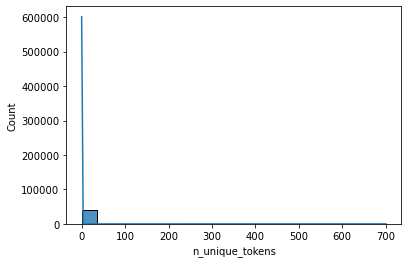

In [16]:
# plot the distribution of n_unique_tokens, to verify this value is a wrong number or not
sns.histplot(x='n_unique_tokens',data=explore_data,alpha=0.8,bins=20,kde=True)

plt.show()

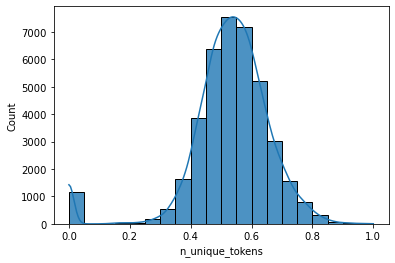

In [17]:
explore_data.loc[explore_data["n_unique_tokens"]==701,"n_unique_tokens"] = 0.701 # this 701 value is wrong and will be replaced to 0.701

sns.histplot(x='n_unique_tokens',data=explore_data,alpha=0.8,bins=20,kde=True) # plot the distribution again, now it is plausible.
plt.show()

indicate and remove the outliers from Target

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


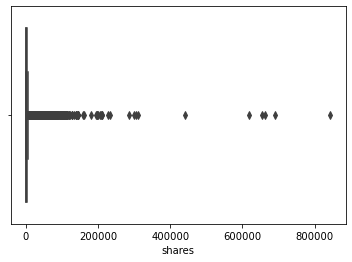

In [18]:
sns.boxplot(new_data["shares"]) 
plt.show()

In [19]:
# 1st quartile (25%)
Q1 = np.percentile(explore_data["shares"], 25)
# 3rd quartile (75%)
Q3 = np.percentile(explore_data["shares"], 75)
# Interquartile range (IQR)
IQR = Q3 - Q1
# outlier step
outlier_step = 3 * IQR
# determine the upper boundary 
upper_boundary = Q3 + outlier_step
# remove the target-outliers
final_data = explore_data[explore_data["shares"] <= upper_boundary]

The outliers will be removed from data set and labeled as tiktok_news

In [20]:
tiktok_news = explore_data[explore_data["shares"] >= upper_boundary]
tiktok_news.insert(tiktok_news.shape[-1], 'Popularity', "hot")
tiktok_news

weekdays        channel  n_tokens_title  n_tokens_content  \
13        monday          world             9.0             285.0   
16        monday          world             8.0            1118.0   
19        monday           tech             8.0            1207.0   
125    wednesday         socmed             9.0             100.0   
129    wednesday  entertainment            10.0             254.0   
...          ...            ...             ...               ...   
39503     sunday         socmed            12.0             590.0   
39537     monday          world             9.0             174.0   
39542     monday           tech            14.0             485.0   
39586    tuesday          world            12.0             318.0   
39621    tuesday          world             9.0             468.0   

       n_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
13            0.744186        4.0             2.0       0.0        21.0   
16            0.512397       26.0            18.0      12.0         1.0   
19            0.410579       24.0            24.0      42.0         0.0   
125           0.760000        3.0             2.0       1.0         0.0   
129           0.627530        5.0             1.0       0.0         3.0   
...                ...        ...             ...       ...         ...   
39503         0.513465       19.0             2.0       1.0         0.0   
39537         0.726190        4.0             4.0       2.0         0.0   
39542         0.509595       12.0             7.0       1.0         1.0   
39586         0.553398        5.0             1.0       1.0         0.0   
39621         0.582781       17.0             1.0       1.0         0.0   

       average_token_length  ...  max_positive_polarity  \
13                 4.343860  ...                   1.00   
16                 4.703936  ...                   1.00   
19                 4.716653  ...                   1.00   
125                4.450000  ...                   0.35   
129                4.625984  ...                   1.00   
...                     ...  ...                    ...   
39503              4.732203  ...                   1.00   
39537              4.224138  ...                   1.00   
39542              4.849485  ...                   0.80   
39586              4.641509  ...                   0.50   
39621              4.854701  ...                   0.50   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
13                 -0.337889                 -0.700              -0.100000   
16                 -0.401437                 -1.000              -0.050000   
19                 -0.226786                 -0.500              -0.050000   
125                 0.000000                  0.000               0.000000   
129                -0.283333                 -0.400              -0.166667   
...                      ...                    ...                    ...   
39503              -0.365000                 -0.750              -0.050000   
39537              -0.311111                 -0.700              -0.100000   
39542              -0.325000                 -0.600              -0.100000   
39586              -0.100000                 -0.125              -0.050000   
39621              -0.282500                 -0.700              -0.100000   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
13               1.000000                 -1.000000                0.500000   
16               0.566667                 -0.100000                0.066667   
19               0.500000                  0.000000                0.000000   
125              0.428571                  0.214286                0.071429   
129              0.600000                  0.500000                0.100000   
...                   ...                       ...                     ...   
39503            0.000000                  0.000000                0.500000   


compare the data set before and after Data-Preprocessing

In [21]:
print(f'the original Dataset is: {original_data.shape}')
print(f'the final dataset after preprocessing is: {final_data.shape}')

the original Dataset is: (39644, 61)
the final dataset after preprocessing is: (36879, 40)


# 2.3	Data exploratory analysis

In this part, the data will be selected out with 2 data sets which are good_news and bad_news for comparison and analysis. Because there are 2765 pieces of data in tiktok_news, same number of lowest and highest shares are selected for the comparison.

In [22]:
good_news = final_data.sort_values(by="shares",ascending=False)[:tiktok_news.shape[0]]
good_news.insert(good_news.shape[-1], 'Popularity', "good")
good_news

weekdays    channel  n_tokens_title  n_tokens_content  \
31169   thursday      world             8.0             428.0   
13151    tuesday       tech            13.0             936.0   
24401  wednesday       tech            14.0             785.0   
39187     sunday  lifestyle             7.0             357.0   
953    wednesday     socmed            11.0             235.0   
...          ...        ...             ...               ...   
22780    tuesday      world            11.0             181.0   
24646     monday        bus            10.0             174.0   
2927     tuesday      world             9.0             278.0   
35288   thursday     socmed             9.0             492.0   
37909    tuesday      world            13.0               0.0   

       n_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
31169         0.442353       20.0             1.0      15.0         1.0   
13151         0.395699        8.0             7.0      15.0         1.0   
24401         0.370038        8.0             4.0       1.0         1.0   
39187         0.590116       24.0             3.0      11.0         0.0   
953           0.625532       10.0             4.0       1.0         0.0   
...                ...        ...             ...       ...         ...   
22780         0.516667       14.0             1.0      12.0         0.0   
24646         0.654971        5.0             1.0       0.0         0.0   
2927          0.428058       23.0             3.0       9.0         1.0   
35288         0.505133        9.0             2.0       4.0         0.0   
37909         0.000000        0.0             0.0       0.0         1.0   

       average_token_length  ...  max_positive_polarity  \
31169              5.058411  ...                   0.85   
13151              4.597222  ...                   1.00   
24401              4.419108  ...                   0.70   
39187              4.801120  ...                   1.00   
953                4.821277  ...                   0.80   
...                     ...  ...                    ...   
22780              4.729282  ...                   0.30   
24646              4.879310  ...                   0.40   
2927               4.633094  ...                   0.50   
35288              4.693089  ...                   0.80   
37909              0.000000  ...                   0.00   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
31169              -0.198611                -0.4000                 -0.125   
13151              -0.240789                -1.0000                 -0.050   
24401              -0.212963                -0.5000                 -0.125   
39187              -0.250000                -0.5000                 -0.050   
953                -0.203125                -0.3125                 -0.125   
...                      ...                    ...                    ...   
22780               0.000000                 0.0000                  0.000   
24646               0.000000                 0.0000                  0.000   
2927               -0.420000                -1.0000                 -0.100   
35288               0.000000                 0.0000                  0.000   
37909               0.000000                 0.0000                  0.000   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
31169            1.000000                  0.500000                0.500000   
13151            1.000000                  0.300000                0.500000   
24401            0.277273                  0.068182                0.222727   
39187            0.066667                  0.000000                0.433333   
953              0.033333                  0.016667                0.466667   
...                   ...                       ...                     ...   
22780            0.400000                  0.050000                0.100000   
24646            0.950000                  0.550

In [23]:
bad_news = final_data.sort_values(by="shares")[:tiktok_news.shape[0]]
bad_news.insert(bad_news.shape[-1], 'Popularity', "bad")
bad_news

weekdays        channel  n_tokens_title  n_tokens_content  \
17266     monday            bus            11.0             944.0   
4709      monday          world             5.0               0.0   
38633   thursday         socmed            15.0             381.0   
9771    thursday         socmed             9.0             639.0   
18957   thursday          world             9.0             106.0   
...          ...            ...             ...               ...   
35309   thursday          world             8.0             272.0   
2034      monday  entertainment             8.0             374.0   
17753  wednesday          world             9.0            1616.0   
38882    tuesday  entertainment            14.0               0.0   
24290     monday          world            10.0             391.0   

       n_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
17266         0.521640       28.0             4.0       0.0        23.0   
4709          0.000000        0.0             0.0       0.0         0.0   
38633         0.554667        1.0             0.0       1.0         0.0   
9771          0.508716        0.0             0.0       0.0         0.0   
18957         0.721154        6.0             3.0       0.0         0.0   
...                ...        ...             ...       ...         ...   
35309         0.660517       21.0             3.0      17.0         2.0   
2034          0.447447        2.0             0.0       1.0         0.0   
17753         0.430634       58.0             5.0      11.0         1.0   
38882         0.000000        0.0             0.0       0.0         1.0   
24290         0.575130        8.0             4.0       1.0         0.0   

       average_token_length  ...  max_positive_polarity  \
17266              4.648305  ...                   1.00   
4709               0.000000  ...                   0.00   
38633              4.574803  ...                   1.00   
9771               4.992175  ...                   0.75   
18957              4.084906  ...                   0.80   
...                     ...  ...                    ...   
35309              4.919118  ...                   0.50   
2034               4.521390  ...                   1.00   
17753              4.621906  ...                   1.00   
38882              0.000000  ...                   0.00   
24290              4.759591  ...                   0.80   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
17266              -0.299306              -0.600000              -0.125000   
4709                0.000000               0.000000               0.000000   
38633              -0.183333              -0.250000              -0.125000   
9771               -0.178472              -0.500000              -0.100000   
18957              -0.362500              -0.600000              -0.125000   
...                      ...                    ...                    ...   
35309              -0.202778              -0.250000              -0.155556   
2034               -0.102381              -0.166667              -0.071429   
17753              -0.225185              -0.500000              -0.125000   
38882               0.000000               0.000000               0.000000   
24290              -0.288580              -0.800000              -0.100000   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
17266            0.000000                  0.000000                0.500000   
4709             0.000000                  0.000000                0.500000   
38633            0.200000                 -0.025000                0.300000   
9771             0.642857                  0.214286                0.142857   
18957            0.950000                  0.200000                0.450000   
...                   ...                       ...                     ...   
35309            0.000000                  0.000000                0.500000   


In [24]:
good_tiktok_comparison = pd.concat([good_news,tiktok_news])
good_bad_comparison = pd.concat([good_news,bad_news])

2.3.1 Data Analysis for Words & Links & digital_media category

In [25]:
words_list = ['n_tokens_title','n_tokens_content','n_unique_tokens','average_token_length']

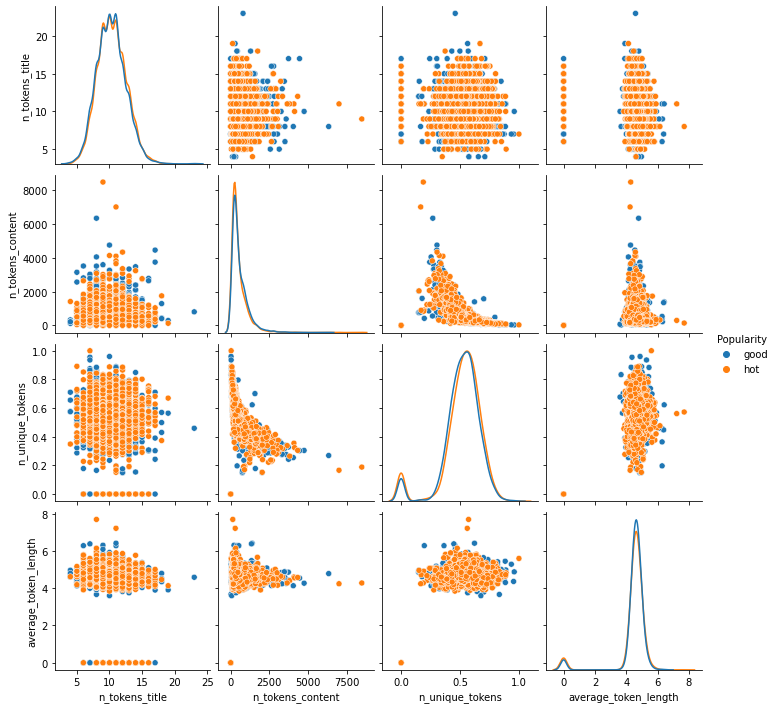

In [26]:
sns.pairplot(good_tiktok_comparison, vars=words_list, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

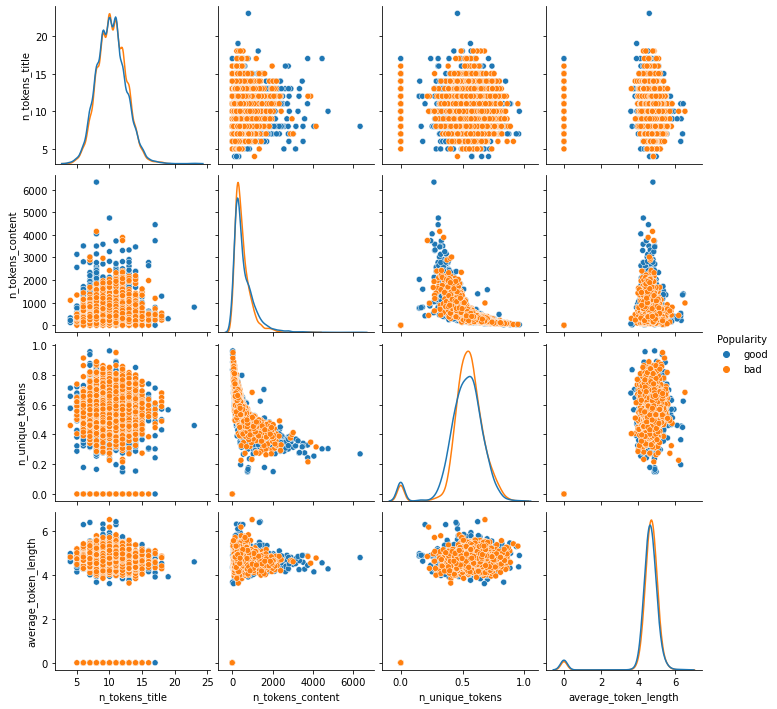

In [27]:
sns.pairplot(good_bad_comparison, vars=words_list, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

In [28]:
links_list = ['num_hrefs','num_self_hrefs','self_reference_avg_sharess']

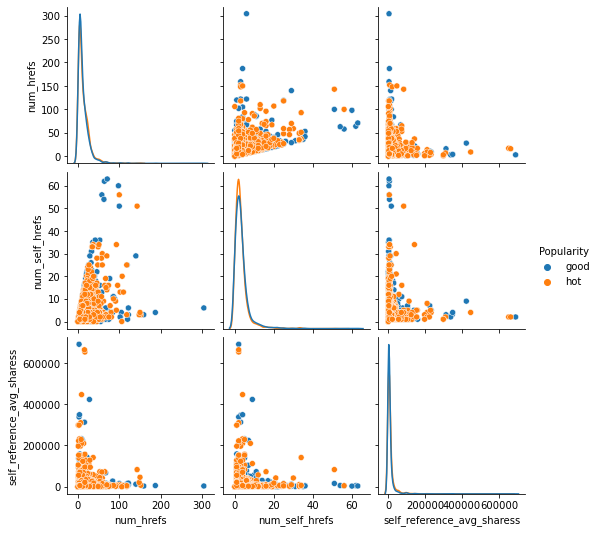

In [29]:
sns.pairplot(good_tiktok_comparison, vars=links_list, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

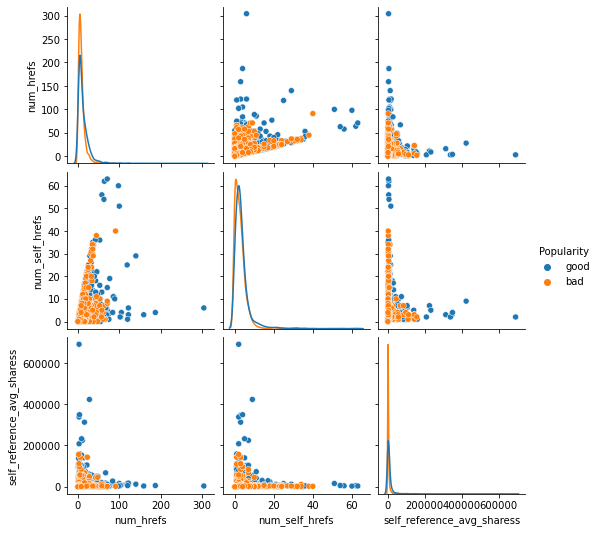

In [30]:
sns.pairplot(good_bad_comparison, vars=links_list, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

In [31]:
digital_media_list = ['num_imgs','num_videos']

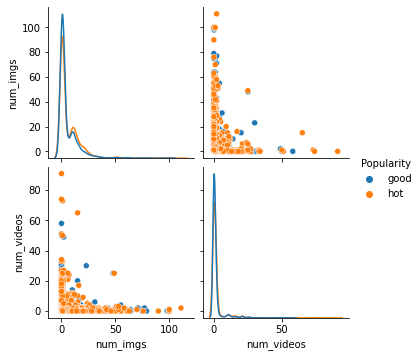

In [32]:
sns.pairplot(good_tiktok_comparison, vars=digital_media_list, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

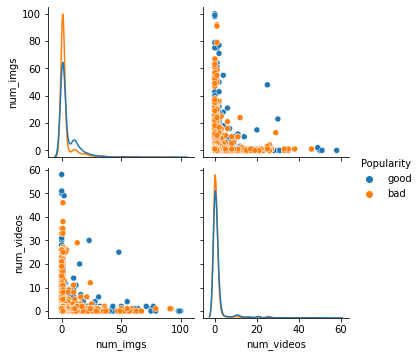

In [33]:
sns.pairplot(good_bad_comparison, vars=digital_media_list, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

2.3.2 Data Analysis for Weekday & Channel category

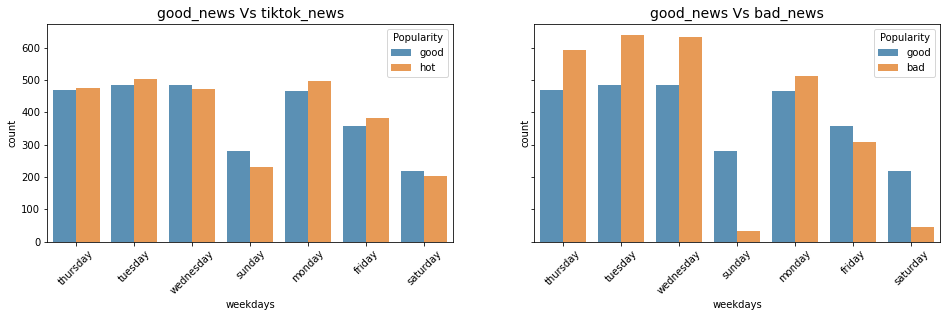

In [34]:
fix, axes = plt.subplots(ncols=2, figsize=(16,4), sharey=True,sharex=True)
plt.sca(axes[0])
sns.countplot(x='weekdays',data=good_tiktok_comparison,alpha=0.8,hue="Popularity")
plt.title("good_news Vs tiktok_news", fontsize=14)
plt.xticks(rotation=45)
plt.sca(axes[1])
sns.countplot(x='weekdays',data=good_bad_comparison,alpha=0.8,hue="Popularity")
plt.title("good_news Vs bad_news", fontsize=14)
plt.xticks(rotation=45)
plt.show()

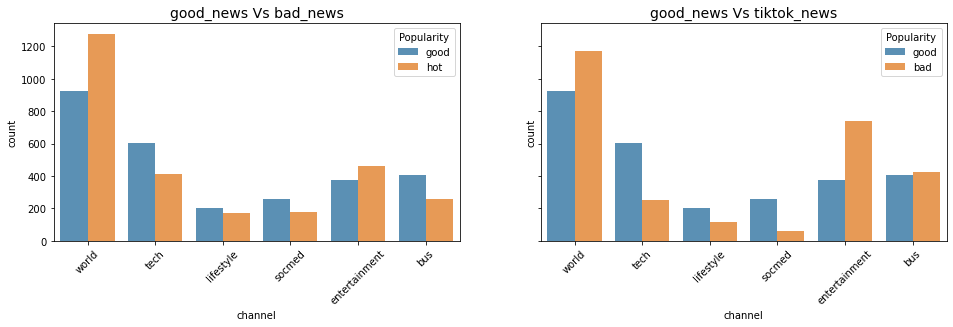

In [35]:
fix, axes = plt.subplots(ncols=2, figsize=(16,4), sharey=True,sharex=True)
plt.sca(axes[0])
sns.countplot(x='channel',data=good_tiktok_comparison,alpha=0.8,hue="Popularity")
plt.title("good_news Vs bad_news", fontsize=14)
plt.xticks(rotation=45)
plt.sca(axes[1])
sns.countplot(x='channel',data=good_bad_comparison,alpha=0.8,hue="Popularity")
plt.title("good_news Vs tiktok_news", fontsize=14)
plt.xticks(rotation=45)
plt.show()

2.3.3 Data Analysis for Keywords category

In [36]:
key_words_list = ['num_keywords','kw_min_min','kw_avg_min','kw_min_max','kw_avg_max','kw_min_avg','kw_avg_avg']

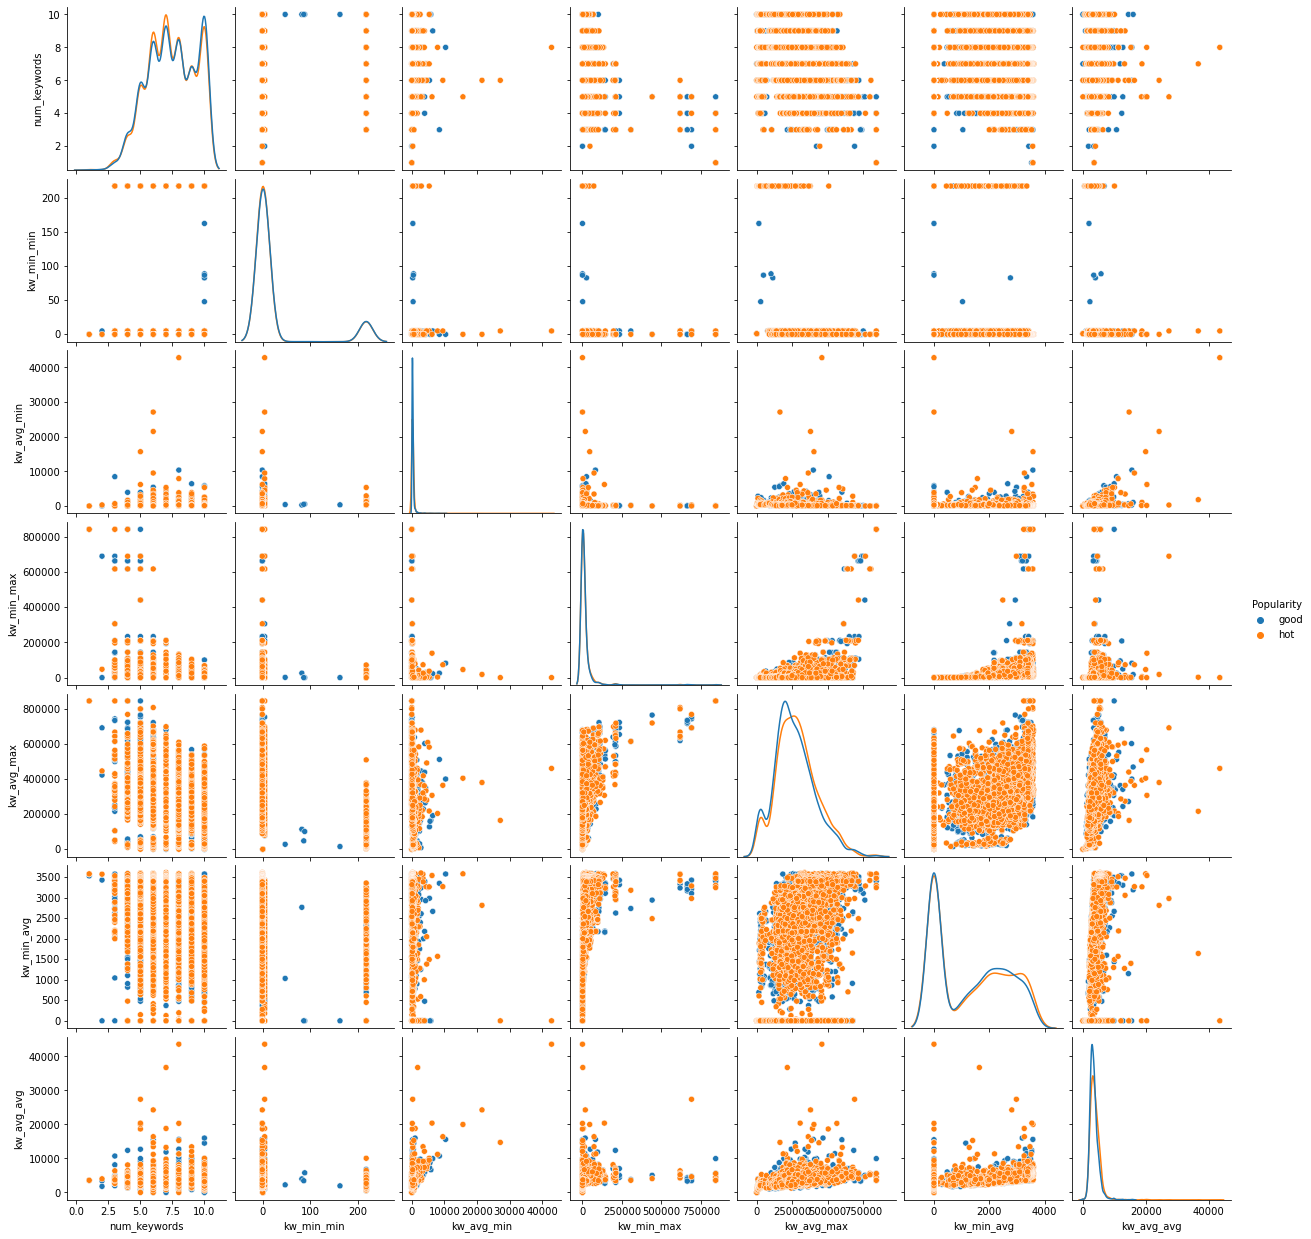

In [37]:
sns.pairplot(good_tiktok_comparison, vars=key_words_list, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

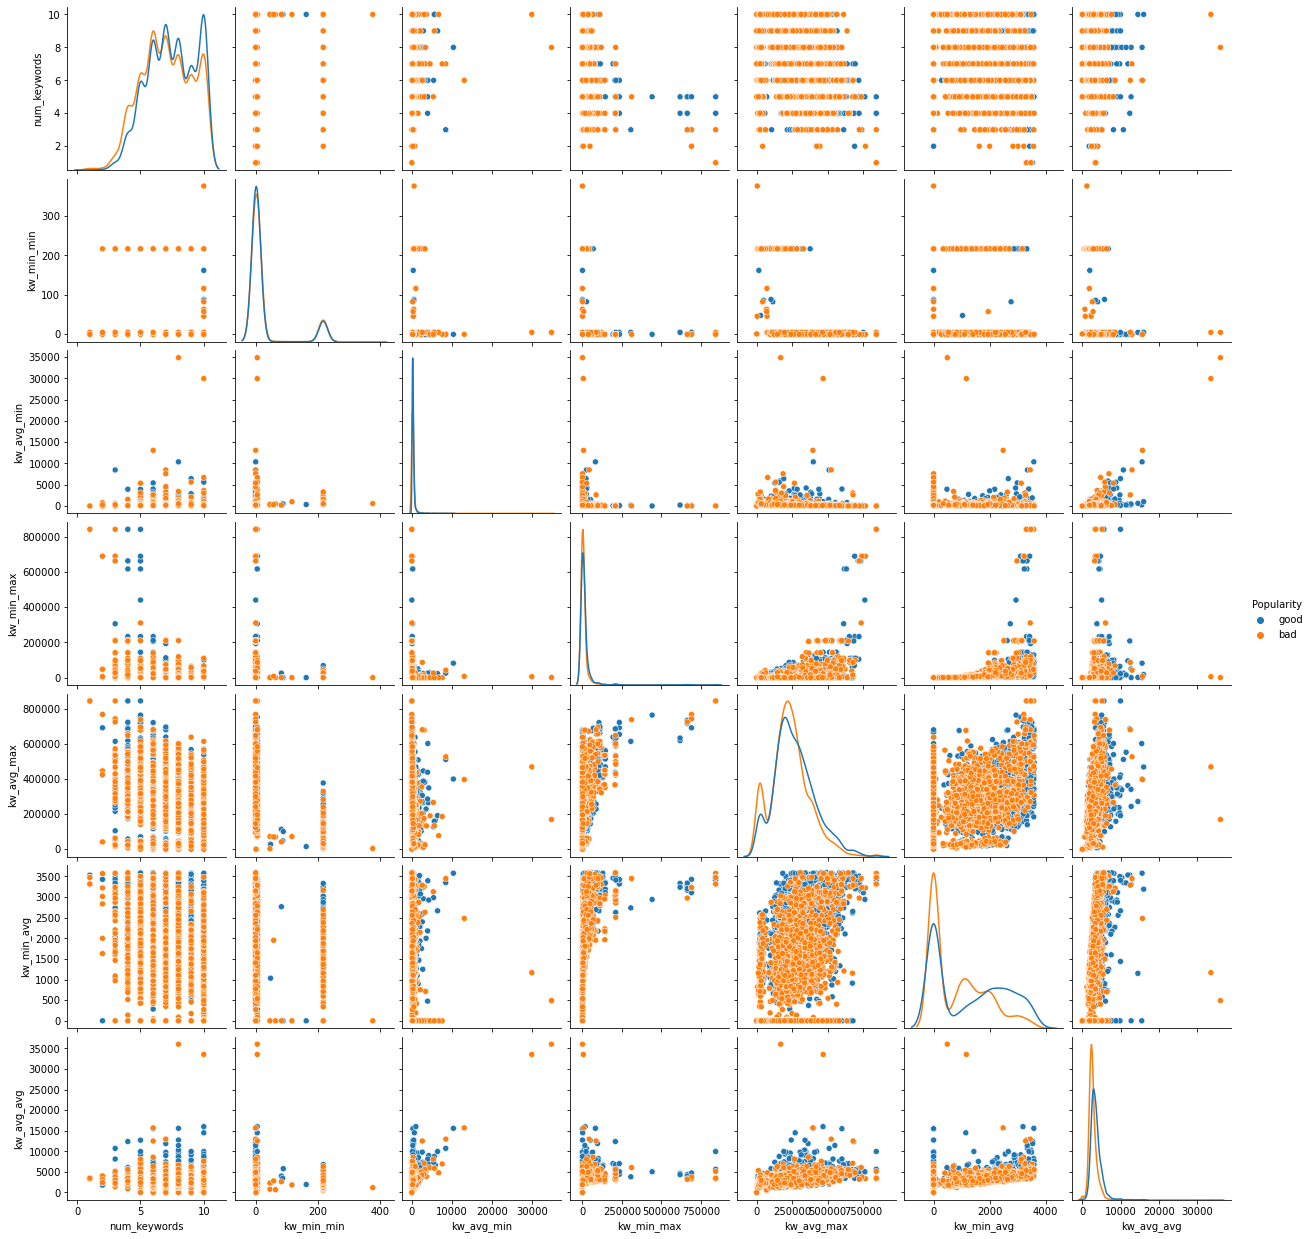

In [38]:
sns.pairplot(good_bad_comparison, vars=key_words_list, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

2.3.4 Data Analysis for NPL category

In [39]:
lda_cols = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03','LDA_04']

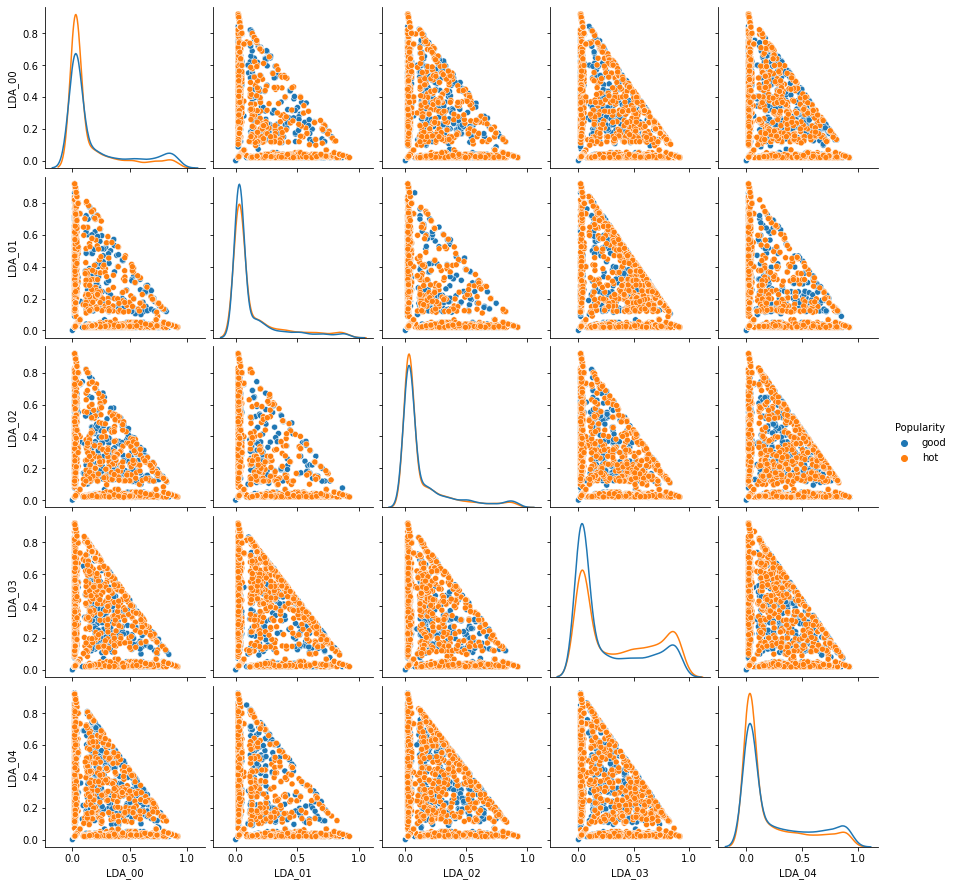

In [40]:
sns.pairplot(good_tiktok_comparison, vars=lda_cols, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

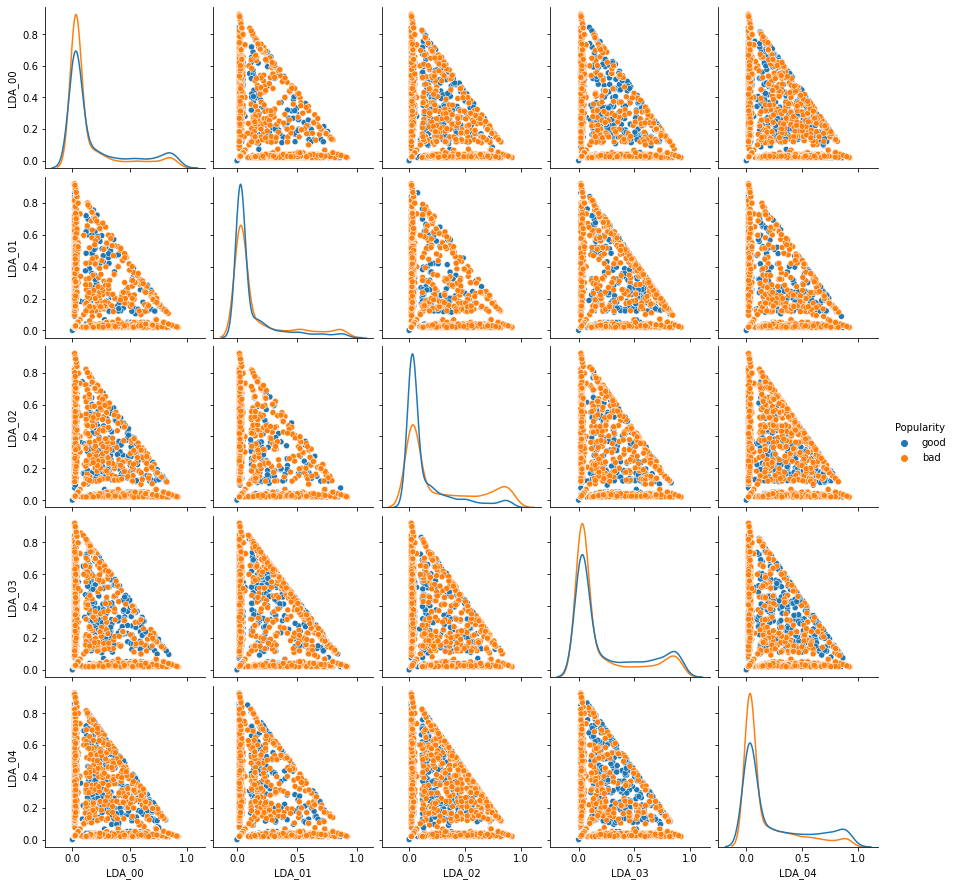

In [41]:
sns.pairplot(good_bad_comparison, vars=lda_cols, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

In [42]:
global_rate_list = ['global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words',
                    'rate_positive_words','rate_negative_words']

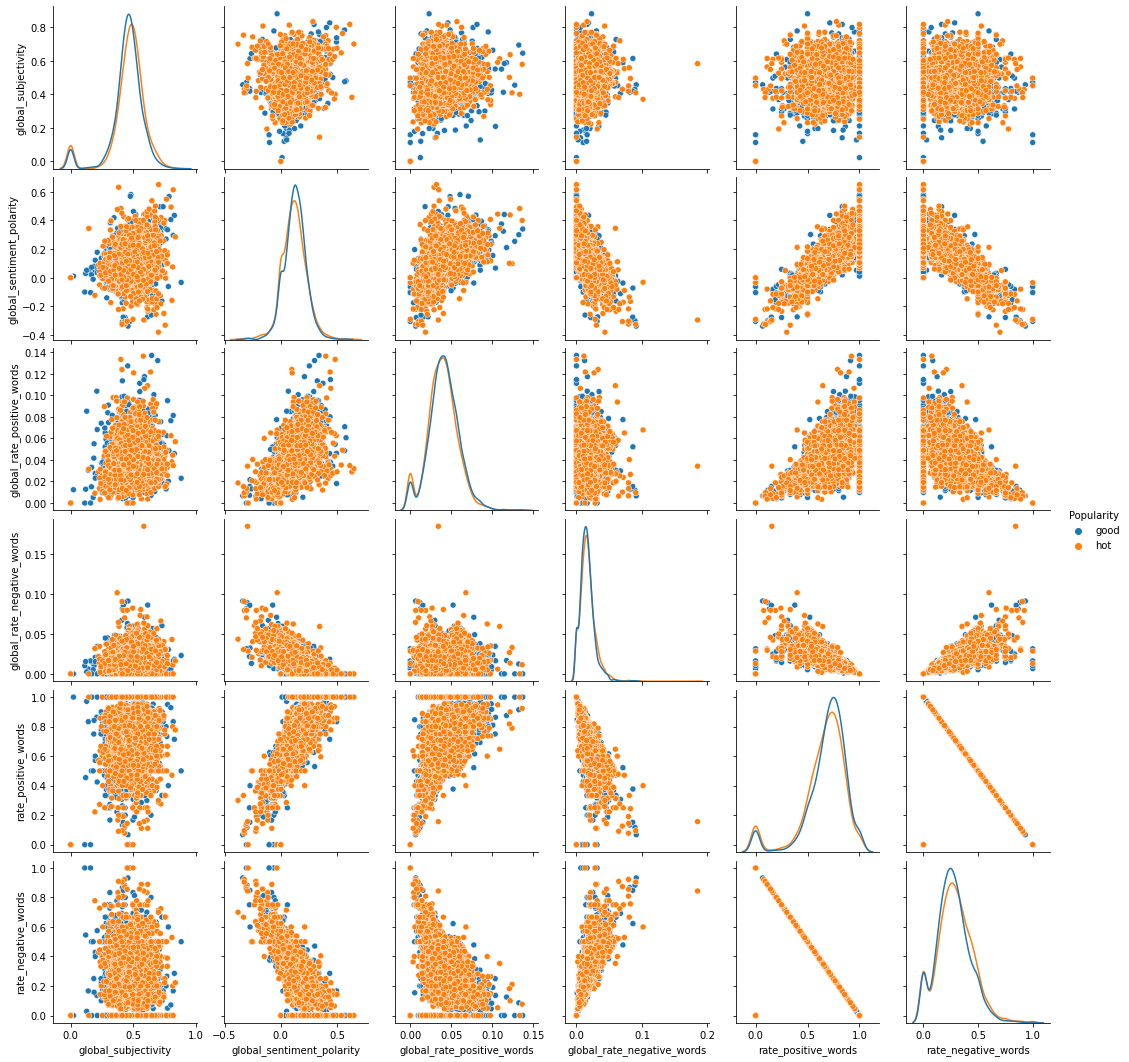

In [43]:
sns.pairplot(good_tiktok_comparison, vars=global_rate_list, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

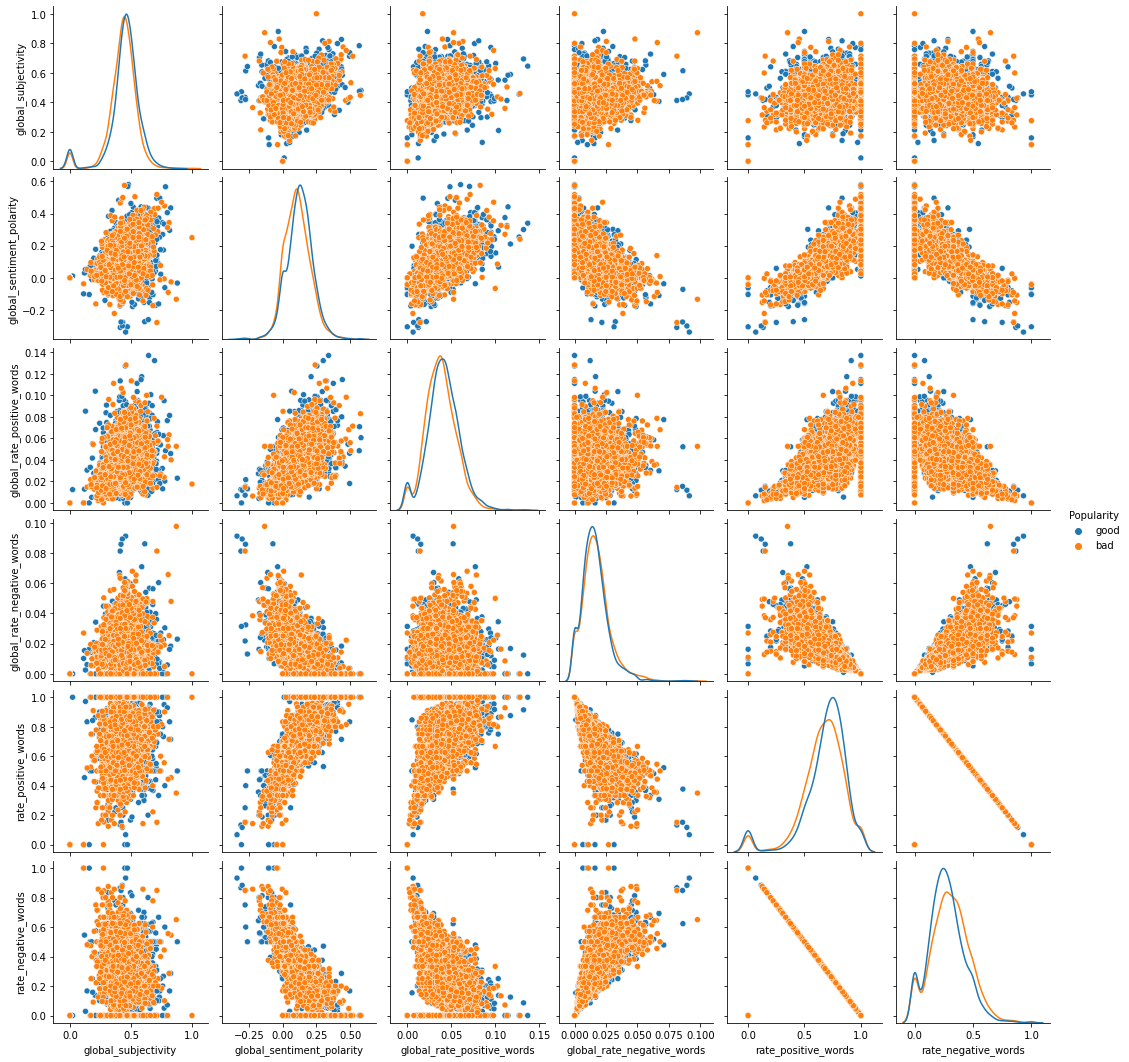

In [44]:
sns.pairplot(good_bad_comparison, vars=global_rate_list, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

In [45]:
polarity_cols = ['avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity',
                'min_negative_polarity','max_negative_polarity']

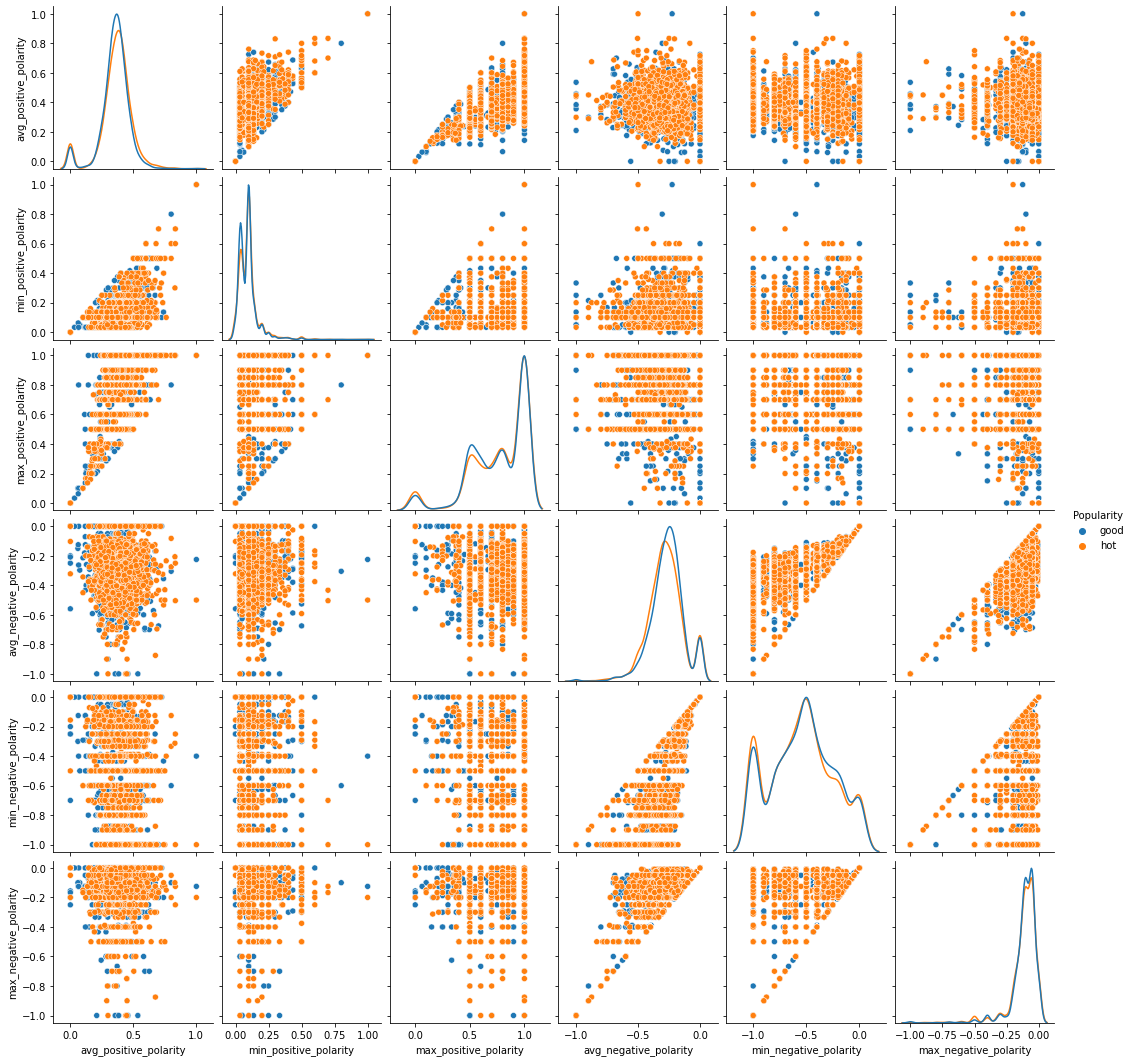

In [46]:
sns.pairplot(good_tiktok_comparison, vars=polarity_cols, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

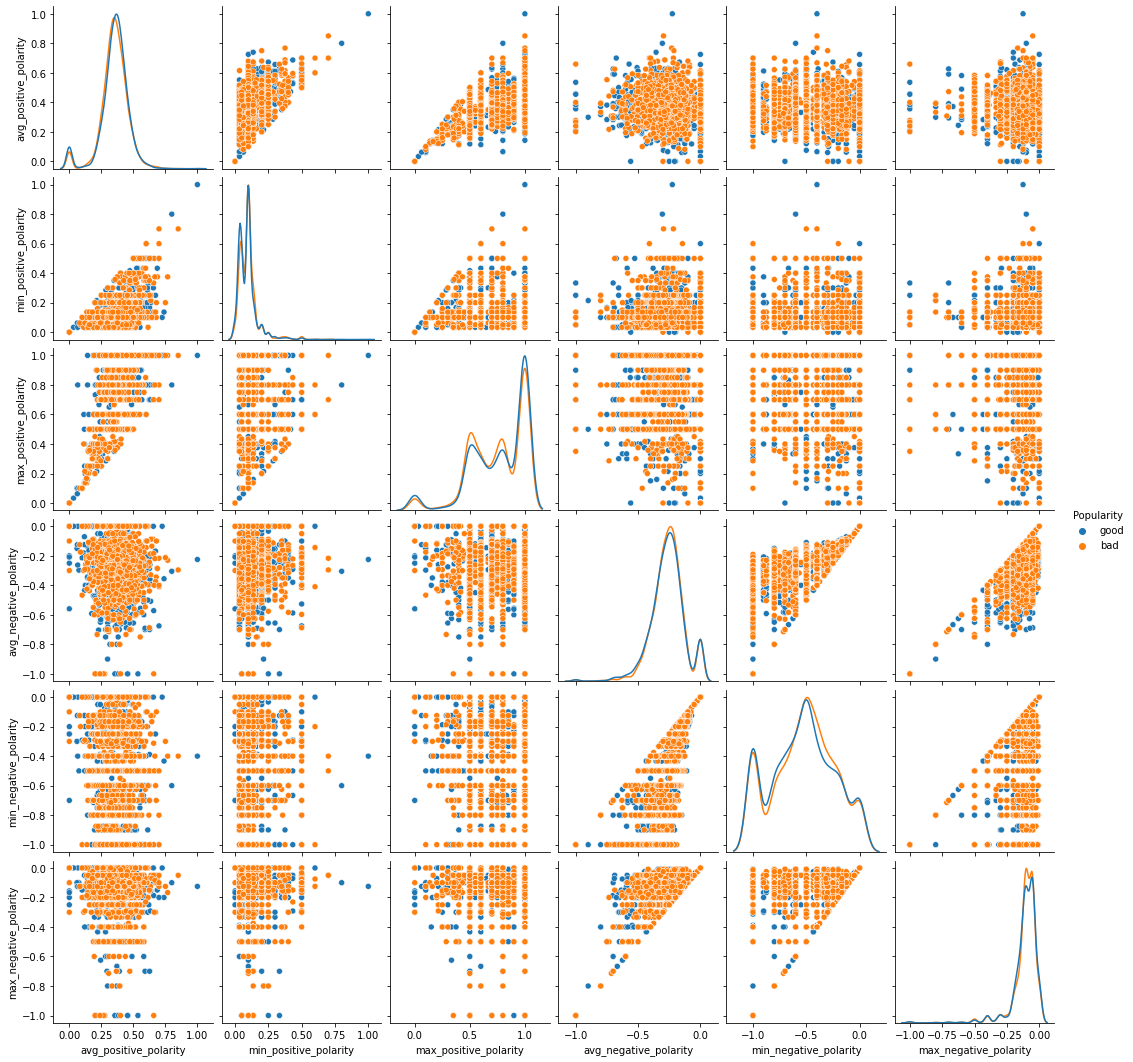

In [47]:
sns.pairplot(good_bad_comparison, vars=polarity_cols, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

In [48]:
title_list = ['title_subjectivity','title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']

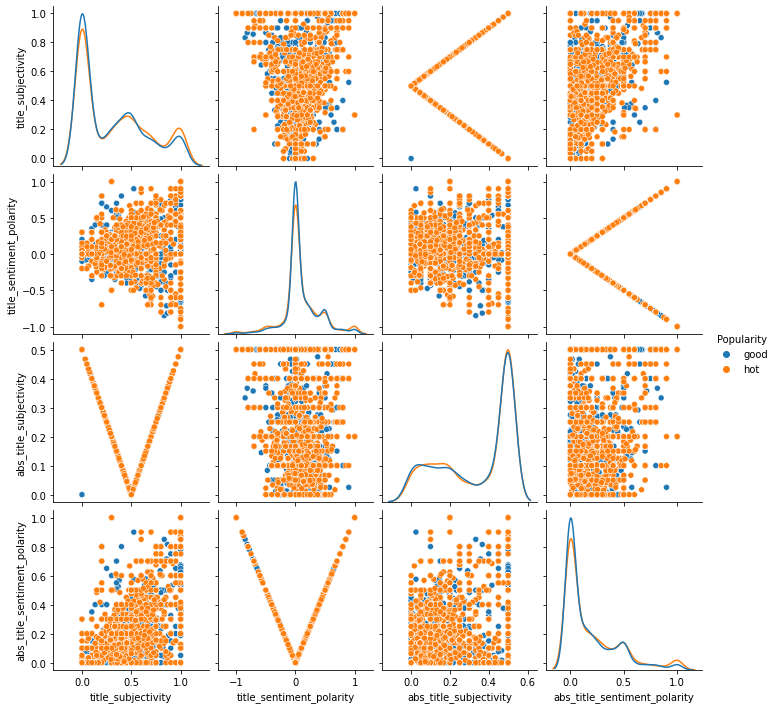

In [49]:
sns.pairplot(good_tiktok_comparison, vars=title_list, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()

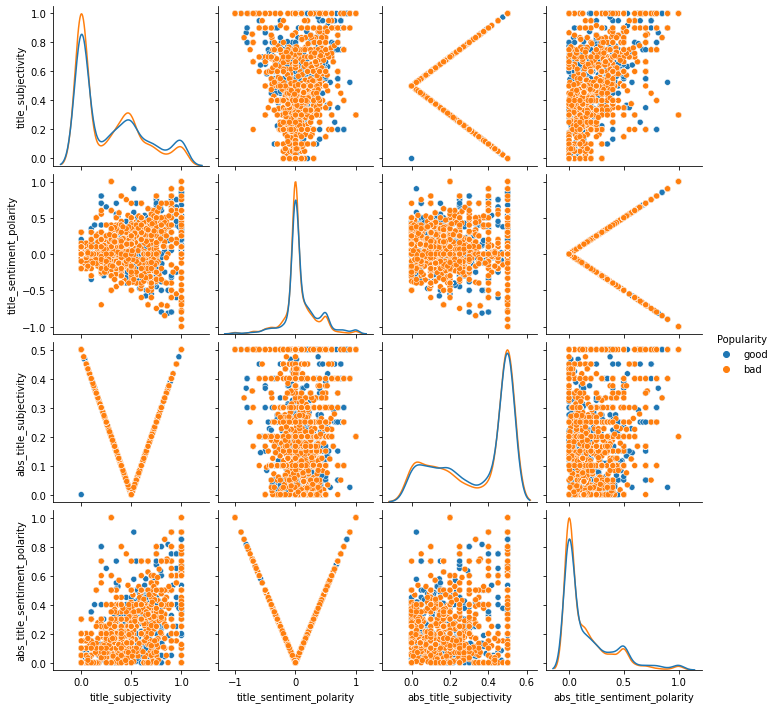

In [50]:
sns.pairplot(good_bad_comparison, vars=title_list, hue='Popularity', diag_kind='kde',diag_kws=dict(shade=False,color="r"))
plt.show()